# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
#3.1 Insert records from 42_District_wise_crimes_committed_against_women_2001_2012.csv into a table.

In [3]:
wcrime_dist = pd.read_csv('crime_women.csv',sep='	')
wcrime_dist

,STATE/UT,DISTRICT,Year,Rape,Kidnapping and Abduction,Dowry Deaths,Assault on women with intent to outrage her modesty,Insult to modesty of Women,Cruelty by Husband or his Relatives,Importation of Girls
0,ANDHRA PRADESH,ADILABAD,2001,50,30,16,149,34,175,0
1,ANDHRA PRADESH,ANANTAPUR,2001,23,30,7,118,24,154,0
2,ANDHRA PRADESH,CHITTOOR,2001,27,34,14,112,83,186,0
3,ANDHRA PRADESH,CUDDAPAH,2001,20,20,17,126,38,57,0
4,ANDHRA PRADESH,EAST GODAVARI,2001,23,26,12,109,58,247,0
...,...,...,...,...,...,...,...,...,...,...
9012,LAKSHADWEEP,LAKSHADWEEP,2012,0,0,0,1,0,1,0
9013,LAKSHADWEEP,TOTAL,2012,0,0,0,1,0,1,0
9014,PUDUCHERRY,KARAIKAL,2012,6,2,0,2,0,1,0
9015,PUDUCHERRY,PUDUCHERRY,2012,7,14,0,7,2,5,0


In [6]:
df_women=pd.DataFrame(data=wcrime_dist)

In [7]:
df_women

,STATE/UT,DISTRICT,Year,Rape,Kidnapping and Abduction,Dowry Deaths,Assault on women with intent to outrage her modesty,Insult to modesty of Women,Cruelty by Husband or his Relatives,Importation of Girls
0,ANDHRA PRADESH,ADILABAD,2001,50,30,16,149,34,175,0
1,ANDHRA PRADESH,ANANTAPUR,2001,23,30,7,118,24,154,0
2,ANDHRA PRADESH,CHITTOOR,2001,27,34,14,112,83,186,0
3,ANDHRA PRADESH,CUDDAPAH,2001,20,20,17,126,38,57,0
4,ANDHRA PRADESH,EAST GODAVARI,2001,23,26,12,109,58,247,0
...,...,...,...,...,...,...,...,...,...,...
9012,LAKSHADWEEP,LAKSHADWEEP,2012,0,0,0,1,0,1,0
9013,LAKSHADWEEP,TOTAL,2012,0,0,0,1,0,1,0
9014,PUDUCHERRY,KARAIKAL,2012,6,2,0,2,0,1,0
9015,PUDUCHERRY,PUDUCHERRY,2012,7,14,0,7,2,5,0


In [8]:
pip install pandas sqlalchemy


Note: you may need to restart the kernel to use updated packages.


In [17]:
pip install pymysql

                                              0.0/45.0 kB ? eta -:--:--
     ---------------------------------------- 45.0/45.0 kB 1.1 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [6]:
import pandas as pd
from sqlalchemy import create_engine

# Ensure pymysql is installed and can be imported
import pymysql

# Step 1: Read the CSV file
csv_file_path = 'crime_women.csv'
data = pd.read_csv(csv_file_path,sep='\t')

# Step 2: Rename columns to shorter names
# Create a dictionary to map original column names to shorter names
rename_columns = {
    'STATE/UT': 'state_ut',
    'DISTRICT': 'district',
    'Year': 'year',
    'Rape': 'rape',
    'Kidnapping and Abduction': 'kidnapping_abduction',
    'Dowry Deaths': 'dowry_deaths',
    'Assault on women with intent to outrage her modesty': 'assault_modesty',
    'Insult to modesty of Women': 'insult_modesty',
    'Cruelty by Husband or his Relatives': 'cruelty_husband',
    'Importation of Girls': 'importation_girls'
}

# Rename the columns in the DataFrame
data.rename(columns=rename_columns, inplace=True)

# Step 2: Create a connection to the MySQL database
# Replace with your actual username, password, host, port, and database name
username = 'root'
password = 'input'
host = 'localhost'
port = 3306
database = 'women'

# Create the connection string
connection_string = f'mysql+pymysql://{username}:{password}@{host}:{port}/{database}'

# Create the engine
engine = create_engine(connection_string)

# Step 3: Insert data into the table
table_name = 'crimes_against_women'
data.to_sql(table_name, engine, if_exists='append', index=False)

print(f"Data inserted into the table {table_name} successfully!")

print("Inserted Data Head:")
result = pd.read_sql_table(table_name, engine)
print(result.head())


Data inserted into the table crimes_against_women successfully!
Inserted Data Head:
         state_ut       district  year  rape  kidnapping_abduction  \
0  ANDHRA PRADESH       ADILABAD  2001    50                    30   
1  ANDHRA PRADESH      ANANTAPUR  2001    23                    30   
2  ANDHRA PRADESH       CHITTOOR  2001    27                    34   
3  ANDHRA PRADESH       CUDDAPAH  2001    20                    20   
4  ANDHRA PRADESH  EAST GODAVARI  2001    23                    26   

   dowry_deaths  assault_modesty  insult_modesty  cruelty_husband  \
0            16              149              34              175   
1             7              118              24              154   
2            14              112              83              186   
3            17              126              38               57   
4            12              109              58              247   

   importation_girls  
0                  0  
1                  0  
2          

In [4]:
table_name

'crimes_against_women'

In [8]:
import pandas as pd
from sqlalchemy import create_engine
import pymysql

# Step 1: Read the CSV file
csv_file_path = 'crime_women.csv'
data = pd.read_csv(csv_file_path, sep='\t')  

# Display the first few rows of the DataFrame to ensure it is loaded correctly
print("DataFrame Head:")
print(data.head())

# Step 2: Rename columns to shorter names
rename_columns = {
    'STATE/UT': 'state_ut',
    'DISTRICT': 'district',
    'Year': 'year',
    'Rape': 'rape',
    'Kidnapping and Abduction': 'kidnapping_abduction',
    'Dowry Deaths': 'dowry_deaths',
    'Assault on women with intent to outrage her modesty': 'assault_modesty',
    'Insult to modesty of Women': 'insult_modesty',
    'Cruelty by Husband or his Relatives': 'cruelty_husband',
    'Importation of Girls': 'importation_girls'
}

# Rename the columns in the DataFrame
data.rename(columns=rename_columns, inplace=True)

# Display the first few rows of the DataFrame to verify the changes
print("Renamed DataFrame Head:")
print(data.head())

# Step 3: Create a connection to the MySQL database
username = 'root'
password = 'input'
host = 'localhost'
port = 3306
database = 'women'  # Ensure this is the correct database

# Create the connection string
connection_string = f'mysql+pymysql://{username}:{password}@{host}:{port}/{database}'

# Create the engine
engine = create_engine(connection_string)

# Verify the connection by listing existing tables
print("Existing Tables:")
existing_tables = engine.table_names()
print(existing_tables)

# Step 4: Insert data into the table
table_name = 'crimes_against_women'
data.to_sql(table_name, engine, if_exists='append', index=False)

print(f"Data inserted into the table {table_name} successfully!")

# Verify the inserted data by reading back from the table
print("Inserted Data Head:")
result = pd.read_sql_table(table_name, engine)
print(result.head())


DataFrame Head:
         STATE/UT       DISTRICT  Year  Rape  Kidnapping and Abduction  \
0  ANDHRA PRADESH       ADILABAD  2001    50                        30   
1  ANDHRA PRADESH      ANANTAPUR  2001    23                        30   
2  ANDHRA PRADESH       CHITTOOR  2001    27                        34   
3  ANDHRA PRADESH       CUDDAPAH  2001    20                        20   
4  ANDHRA PRADESH  EAST GODAVARI  2001    23                        26   

   Dowry Deaths  Assault on women with intent to outrage her modesty  \
0            16                                                149     
1             7                                                118     
2            14                                                112     
3            17                                                126     
4            12                                                109     

   Insult to modesty of Women  Cruelty by Husband or his Relatives  \
0                          34       

C:\Users\lenovo\AppData\Local\Temp\ipykernel_1076\1115947613.py:49: SADeprecationWarning: The Engine.table_names() method is deprecated and will be removed in a future release.  Please refer to Inspector.get_table_names(). (deprecated since: 1.4)
  existing_tables = engine.table_names()


['crimes_against_women']
Data inserted into the table crimes_against_women successfully!
Inserted Data Head:
         state_ut       district  year  rape  kidnapping_abduction  \
0  ANDHRA PRADESH       ADILABAD  2001    50                    30   
1  ANDHRA PRADESH      ANANTAPUR  2001    23                    30   
2  ANDHRA PRADESH       CHITTOOR  2001    27                    34   
3  ANDHRA PRADESH       CUDDAPAH  2001    20                    20   
4  ANDHRA PRADESH  EAST GODAVARI  2001    23                    26   

   dowry_deaths  assault_modesty  insult_modesty  cruelty_husband  \
0            16              149              34              175   
1             7              118              24              154   
2            14              112              83              186   
3            17              126              38               57   
4            12              109              58              247   

   importation_girls  
0                  0  
1        

In [ ]:
#Write SQL query to find the highest number of rapes & Kidnappings that happened in which state, District, and year.

In [12]:
""""SELECT * FROM crimes_against_women ;
-- Step 1: Find the maximum values
SELECT MAX(rape) AS max_rape, MAX(kidnapping_abduction) AS max_kidnapping_abduction
FROM crimes_against_women;



-- Step 2: Filter rows with these maximum values
SELECT state_ut, district, year,rape,kidnapping_abduction
FROM crimes_against_women
WHERE rape = (SELECT MAX(rape) FROM crimes_against_women)
   OR kidnapping_abduction = (SELECT MAX(kidnapping_abduction) FROM crimes_against_women);"""

'"SELECT * FROM crimes_against_women ;\n-- Step 1: Find the maximum values\nSELECT MAX(rape) AS max_rape, MAX(kidnapping_abduction) AS max_kidnapping_abduction\nFROM crimes_against_women;\n\n\n\n-- Step 2: Filter rows with these maximum values\nSELECT state_ut, district, year,rape,kidnapping_abduction\nFROM crimes_against_women\nWHERE rape = (SELECT MAX(rape) FROM crimes_against_women)\n   OR kidnapping_abduction = (SELECT MAX(kidnapping_abduction) FROM crimes_against_women);'

In [13]:
#Write SQL query to find All the lowest number of rapes & Kidnappings that happened in which state, District, and year.

In [1]:
""""select * from crimes_against_women;
-- Step 1: Find the min values
select min(rape) as min_rape, min(kidnapping_abduction) as min_kidnapping_abduction
from crimes_against_women;

-- Step 2: Filter rows with these minimum values

select state_ut, district, year,rape,kidnapping_abduction from crimes_against_women
where rape=(select min(rape) from crimes_against_women) 
and kidnapping_abduction= (select min(kidnapping_abduction) from crimes_against_women)"""

'"select * from crimes_against_women;\n-- Step 1: Find the min values\nselect min(rape) as min_rape, min(kidnapping_abduction) as min_kidnapping_abduction\nfrom crimes_against_women;\n\n-- Step 2: Filter rows with these minimum values\n\nselect state_ut, district, year,rape,kidnapping_abduction from crimes_against_women\nwhere rape=(select min(rape) from crimes_against_women) \nand kidnapping_abduction= (select min(kidnapping_abduction) from crimes_against_women)'

In [2]:
#Insert records from 02_District_wise_crimes_committed_against_ST_2001_2012.csv into a new table

In [14]:
import pandas as pd
from sqlalchemy import create_engine
import pymysql

# Step 1: Read the CSV file
csv_file_path = 'crime_st.csv'
data = pd.read_csv(csv_file_path, sep='\t')  

# Display the first few rows of the DataFrame to ensure it is loaded correctly
print("DataFrame Head:")
print(data.head())

# Step 2: Rename columns to shorter names
rename_columns = {
    'STATE/UT': 'state_ut',
    'DISTRICT': 'district',
    'Year': 'year',
    'Murder': 'murder',
    'Rape': 'rape',
    'Kidnapping and Abduction':'kidnapping_abduction',
    'Dacoity': 'dacoity',
    'Robbery': 'robbery',
    'Arson': 'arson',
    'Hurt': 'hurt',
    'Protection of Civil Rights (PCR) Act': 'protection_civil_rights',
    'Prevention of atrocities (POA) Act' : 'prevention_atrocities',
    'Other Crimes Against STs' : 'other_crimes_st'
}

# Rename the columns in the DataFrame
data.rename(columns=rename_columns, inplace=True)

# Display the first few rows of the DataFrame to verify the changes
print("Renamed DataFrame Head:")
print(data.head())

# Step 3: Create a connection to the MySQL database
username = 'root'
password = 'input'
host = 'localhost'
port = 3306
database = 'crime_st' 

# Create the connection string
connection_string = f'mysql+pymysql://{username}:{password}@{host}:{port}/{database}'

# Create the engine
engine = create_engine(connection_string)

# Verify the connection by listing existing tables
print("Existing Tables:")
existing_tables = engine.table_names()
print(existing_tables)

# Step 4: Insert data into the table
table_name = 'crimes_against_st'
data.to_sql(table_name, engine, if_exists='append', index=False)

print(f"Data inserted into the table {table_name} successfully!")

# Verify the inserted data by reading back from the table
print("Inserted Data Head:")
result = pd.read_sql_table(table_name, engine)
print(result.head())


DataFrame Head:
         STATE/UT       DISTRICT  Year  Murder  Rape  Kidnapping Abduction  \
0  ANDHRA PRADESH       ADILABAD  2001       0     1                     2   
1  ANDHRA PRADESH      ANANTAPUR  2001       0     0                     0   
2  ANDHRA PRADESH       CHITTOOR  2001       0     0                     0   
3  ANDHRA PRADESH       CUDDAPAH  2001       0     0                     0   
4  ANDHRA PRADESH  EAST GODAVARI  2001       0     0                     0   

   Dacoity  Robbery  Arson  Hurt  Protection of Civil Rights (PCR) Act  \
0        0        0      0     2                                     0   
1        0        0      0     7                                     0   
2        0        0      0     2                                     0   
3        0        0      0     2                                     0   
4        0        0      0     0                                     0   

   Prevention of atrocities (POA) Act  Other Crimes Against STs  
0   

C:\Users\lenovo\AppData\Local\Temp\ipykernel_4996\4279415315.py:52: SADeprecationWarning: The Engine.table_names() method is deprecated and will be removed in a future release.  Please refer to Inspector.get_table_names(). (deprecated since: 1.4)
  existing_tables = engine.table_names()


Data inserted into the table crimes_against_st successfully!
Inserted Data Head:
         state_ut       district  year  Murder  rape  Kidnapping Abduction  \
0  ANDHRA PRADESH       ADILABAD  2001       0     1                     2   
1  ANDHRA PRADESH      ANANTAPUR  2001       0     0                     0   
2  ANDHRA PRADESH       CHITTOOR  2001       0     0                     0   
3  ANDHRA PRADESH       CUDDAPAH  2001       0     0                     0   
4  ANDHRA PRADESH  EAST GODAVARI  2001       0     0                     0   

   dacoity  robbery  arson  hurt  protection_civil_rights  \
0        0        0      0     2                        0   
1        0        0      0     7                        0   
2        0        0      0     2                        0   
3        0        0      0     2                        0   
4        0        0      0     0                        0   

   prevention_atrocities  other_crimes_st  
0                      0               

In [8]:
#Write SQL query to find the highest number of dacoity/robbery in which district.

In [22]:
""""select * from crimes_against_st;

-- Step 1: Find the maximum values
SELECT MAX(dacoity) AS max_dacoity, MAX(robbery) AS max_robbery
FROM crimes_against_st;

-- Step 2: Filter rows with these maximum values

SELECT district FROM crimes_against_st
WHERE dacoity=(SELECT MAX(dacoity) FROM crimes_against_st) 
AND robbery=(SELECT MAX(robbery) FROM crimes_against_st);"""

'"select * from crimes_against_st;\n\n-- Step 1: Find the maximum values\nSELECT MAX(dacoity) AS max_dacoity, MAX(robbery) AS max_robbery\nFROM crimes_against_st;\n\n-- Step 2: Filter rows with these maximum values\n\nSELECT district FROM crimes_against_st\nWHERE dacoity=(SELECT MAX(dacoity) FROM crimes_against_st) \nAND robbery=(SELECT MAX(robbery) FROM crimes_against_st);'

In [23]:
#Write SQL query to find in which districts(All) the lowest number of murders happened.

In [11]:
"""""select * from crimes_against_st;

-- Step 1: Find the min values
WITH min_values as (
SELECT 
MIN(Murder) AS min_murder 
FROM crimes_against_st)

-- Step 2: Filter rows with these min values

SELECT district 
FROM crimes_against_st
WHERE Murder=(SELECT min_murder FROM min_values);"""

'""select * from crimes_against_st;\n\n-- Step 1: Find the min values\nWITH min_values as (\nSELECT \nMIN(Murder) AS min_murder \nFROM crimes_against_st)\n\n-- Step 2: Filter rows with these min values\n\nSELECT district \nFROM crimes_against_st\nWHERE Murder=(SELECT min_murder FROM min_values);'

In [12]:
#Write SQL query to find the number of murders in ascending order in district and year wise.

In [13]:
""""SELECT district, year, Murder 
FROM crimes_against_st
ORDER BY Murder ASC, district ASC, year ASC"""

'"SELECT district, year, Murder \nFROM crimes_against_st\nORDER BY Murder ASC, district ASC, year ASC'

In [15]:
#Insert records of STATE/UT, DISTRICT, YEAR, MURDER, ATTEMPT TO MURDER, and RAPE columns only from 01_District_wise_crimes_committed_IPC_2001_2012.csv into a new table

In [31]:
import pandas as pd
from sqlalchemy import create_engine
import pymysql

# Step 1: Read the CSV file
csv_file_path = 'crime_ipc.csv'
data = pd.read_csv(csv_file_path, sep='\t')  

# Display the first few rows of the DataFrame to ensure it is loaded correctly
print("DataFrame Head:")
print(data.head())

#Select only the required columns
required_columns = ['STATE/UT', 'DISTRICT', 'Year', 'MURDER', 'ATTEMPT TO MURDER', 'RAPE']
data = data[required_columns]

# Step 2: Rename columns to shorter names
rename_columns = {
    'STATE/UT': 'state_ut',
    'DISTRICT': 'district',
    'Year': 'year',
    'MURDER': 'murder',
    'ATTEMPT TO MURDER': 'attempt_murder',
    'RAPE': 'rape',
}

# Rename the columns in the DataFrame
data.rename(columns=rename_columns, inplace=True)

# Display the first few rows of the DataFrame to verify the changes
print("Renamed DataFrame Head:")
print(data.head())

# Step 3: Filter out the "Total" value in the district column
data = data.query('district != "TOTAL" and district != "DELHI UT TOTAL"')

# Step 4: Create a connection to the MySQL database
username = 'root'
password = 'input'
host = 'localhost'
port = 3306
database = 'crime_ipc' 

# Create the connection string
connection_string = f'mysql+pymysql://{username}:{password}@{host}:{port}/{database}'

# Create the engine
engine = create_engine(connection_string)

# Verify the connection by listing existing tables
print("Existing Tables:")
existing_tables = engine.table_names()
print(existing_tables)

# Step 4: Insert data into the table
table_name = 'crime2_ipc'
data.to_sql(table_name, engine, if_exists='append', index=False)

print(f"Data inserted into the table {table_name} successfully!")

# Verify the inserted data by reading back from the table
print("Inserted Data Head:")
result = pd.read_sql_table(table_name, engine)
print(result.head())


DataFrame Head:
         STATE/UT       DISTRICT  Year  MURDER  ATTEMPT TO MURDER  \
0  ANDHRA PRADESH       ADILABAD  2001     101                 60   
1  ANDHRA PRADESH      ANANTAPUR  2001     151                125   
2  ANDHRA PRADESH       CHITTOOR  2001     101                 57   
3  ANDHRA PRADESH       CUDDAPAH  2001      80                 53   
4  ANDHRA PRADESH  EAST GODAVARI  2001      82                 67   

   CULPABLE HOMICIDE NOT AMOUNTING TO MURDER  RAPE  CUSTODIAL RAPE  \
0                                         17    50               0   
1                                          1    23               0   
2                                          2    27               0   
3                                          1    20               0   
4                                          1    23               0   

   OTHER RAPE  KIDNAPPING & ABDUCTION  ...  ARSON  HURT/GREVIOUS HURT  \
0          50                      46  ...     30                1131   
1 

C:\Users\lenovo\AppData\Local\Temp\ipykernel_4996\352963405.py:52: SADeprecationWarning: The Engine.table_names() method is deprecated and will be removed in a future release.  Please refer to Inspector.get_table_names(). (deprecated since: 1.4)
  existing_tables = engine.table_names()


Data inserted into the table crime2_ipc successfully!
Inserted Data Head:
         state_ut       district  year  murder  attempt_murder  rape
0  ANDHRA PRADESH       ADILABAD  2001     101              60    50
1  ANDHRA PRADESH      ANANTAPUR  2001     151             125    23
2  ANDHRA PRADESH       CHITTOOR  2001     101              57    27
3  ANDHRA PRADESH       CUDDAPAH  2001      80              53    20
4  ANDHRA PRADESH  EAST GODAVARI  2001      82              67    23


In [24]:
#Write SQL query to find which District in each state/UT has the highest number of murders year wise. Your output should show STATE/UT, YEAR, DISTRICT, and MURDERS.

In [32]:
""""SELECT state_ut, year, district, murder
FROM (
  SELECT 
    state_ut,
    year,
    district,
    murder,
    MAX(murder) OVER (PARTITION BY state_ut, year) AS max_murders
  FROM 
    crime2_ipc
) AS subquery
WHERE murder = max_murders
ORDER BY state_ut, year;"""

'"SELECT state_ut, year, district, murder\nFROM (\n  SELECT \n    state_ut,\n    year,\n    district,\n    murder,\n    MAX(murder) OVER (PARTITION BY state_ut, year) AS max_murders\n  FROM \n    crime2_ipc\n) AS subquery\nWHERE murder = max_murders\nORDER BY state_ut, year;'

In [33]:
#Store the above data (the result of 3.2) in DataFrame and analyze districts that appear 3 or more than 3 years and print the corresponding state/UT, district, murders, and year in descending order.

In [2]:
import pandas as pd
import sqlite3

# Assuming we are using a SQLite database connection
conn = sqlite3.connect('crime_data.db')

# SQL query to execute
query = """
SELECT state_ut, year, district, murder
FROM (
  SELECT 
    state_ut,
    year,
    district,
    murder,
    MAX(murder) OVER (PARTITION BY state_ut, year) AS max_murders
  FROM 
    crime2_ipc
) AS subquery   
WHERE murder = max_murders
ORDER BY state_ut, year;
"""

# Execute the query and store the result in a DataFrame
df = pd.read_sql_query(query, conn)

# Analyze districts that appear 3 or more years
district_counts = df['district'].value_counts()
frequent_districts = district_counts[district_counts >= 3].index

# Filter the DataFrame for these districts
filtered_df = df[df['district'].isin(frequent_districts)]

# Sort the filtered DataFrame in descending order
sorted_filtered_df = filtered_df.sort_values(by=['state_ut', 'district', 'year', 'murder'], ascending=[True, True, False, False])

# Print the results
print(sorted_filtered_df)

# Close the database connection
conn.close()


DatabaseError: Execution failed on sql '
SELECT state_ut, year, district, murder
FROM (
  SELECT 
    state_ut,
    year,
    district,
    murder,
    MAX(murder) OVER (PARTITION BY state_ut, year) AS max_murders
  FROM 
    crime2_ipc
) AS subquery   
WHERE murder = max_murders
ORDER BY state_ut, year;
': no such table: crime2_ipc

In [3]:
pip install mysql-connector-python


                                              0.0/14.3 MB ? eta -:--:--
                                              0.2/14.3 MB 4.6 MB/s eta 0:00:04
                                              0.3/14.3 MB 3.7 MB/s eta 0:00:04
     -                                        0.4/14.3 MB 3.2 MB/s eta 0:00:05
     -                                        0.6/14.3 MB 3.2 MB/s eta 0:00:05
     --                                       0.7/14.3 MB 3.3 MB/s eta 0:00:05
     --                                       0.9/14.3 MB 3.3 MB/s eta 0:00:05
     --                                       1.1/14.3 MB 3.4 MB/s eta 0:00:04
     ---                                      1.2/14.3 MB 3.3 MB/s eta 0:00:05
     ---                                      1.3/14.3 MB 3.1 MB/s eta 0:00:05
     ----                                     1.5/14.3 MB 3.1 MB/s eta 0:00:05
     ----                                     1.5/14.3 MB 3.1 MB/s eta 0:00:05
     ----                                     1.6/14.3 MB 

In [7]:
import mysql.connector
import pandas as pd

# Connect to the MySQL database
conn = mysql.connector.connect(
    host='localhost',  
    user='root',  
    password='input',
    port = 3306,
    database='crime_ipc' 
)


# SQL query to execute
query = """
SELECT state_ut, year, district, murder
FROM (
  SELECT 
    state_ut,
    year,
    district,
    murder,
    MAX(murder) OVER (PARTITION BY state_ut, year) AS max_murders
  FROM 
    crime2_ipc
) AS subquery
WHERE murder = max_murders
ORDER BY state_ut, year;
"""

# Execute the query and store the result in a DataFrame
df = pd.read_sql_query(query, conn)

# Close the database connection
conn.close()

# Analyze districts that appear 3 or more years
district_counts = df['district'].value_counts()
frequent_districts = district_counts[district_counts >= 3].index

# Filter the DataFrame for these districts
filtered_df = df[df['district'].isin(frequent_districts)]

# Sort the filtered DataFrame in descending order
sorted_filtered_df = filtered_df.sort_values(by=['state_ut', 'district', 'year', 'murder'], ascending=[True, True, False, False])

# Print the results
print(sorted_filtered_df)


C:\Users\lenovo\AppData\Local\Temp\ipykernel_10804\1245824682.py:32: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query, conn)


          state_ut  year           district  murder
10   A & N ISLANDS  2011            ANDAMAN      14
9    A & N ISLANDS  2010            ANDAMAN       8
8    A & N ISLANDS  2009            ANDAMAN      15
7    A & N ISLANDS  2008            ANDAMAN       8
5    A & N ISLANDS  2006            ANDAMAN       3
..             ...   ...                ...     ...
429    WEST BENGAL  2002  24 PARGANAS NORTH     204
428    WEST BENGAL  2001  24 PARGANAS NORTH     202
439    WEST BENGAL  2012  24 PARGANAS SOUTH     224
438    WEST BENGAL  2011  24 PARGANAS SOUTH     247
435    WEST BENGAL  2008  24 PARGANAS SOUTH     239

[372 rows x 4 columns]


In [8]:
sorted_filtered_df

,state_ut,year,district,murder
10,A & N ISLANDS,2011,ANDAMAN,14
9,A & N ISLANDS,2010,ANDAMAN,8
8,A & N ISLANDS,2009,ANDAMAN,15
7,A & N ISLANDS,2008,ANDAMAN,8
5,A & N ISLANDS,2006,ANDAMAN,3
...,...,...,...,...
429,WEST BENGAL,2002,24 PARGANAS NORTH,204
428,WEST BENGAL,2001,24 PARGANAS NORTH,202
439,WEST BENGAL,2012,24 PARGANAS SOUTH,224
438,WEST BENGAL,2011,24 PARGANAS SOUTH,247


In [9]:
import pandas as pd
from sqlalchemy import create_engine

# Replace with your actual database credentials
username = 'root'
password = 'input'
host = 'localhost'
database = 'crime_ipc'

# Create the SQLAlchemy engine
engine = create_engine(f'mysql+mysqlconnector://{username}:{password}@{host}/{database}')

# SQL query to execute
query = """
SELECT state_ut, year, district, murder
FROM (
  SELECT 
    state_ut,
    year,
    district,
    murder,
    MAX(murder) OVER (PARTITION BY state_ut, year) AS max_murders
  FROM 
    crime2_ipc
) AS subquery
WHERE murder = max_murders
ORDER BY state_ut, year;
"""

# Execute the query and store the result in a DataFrame
df = pd.read_sql_query(query, engine)

# Analyze districts that appear 3 or more years
district_counts = df['district'].value_counts()
frequent_districts = district_counts[district_counts >= 3].index

# Filter the DataFrame for these districts
filtered_df = df[df['district'].isin(frequent_districts)]

# Sort the filtered DataFrame in descending order for all specified columns
sorted_filtered_df = filtered_df.sort_values(by=['state_ut', 'district', 'year', 'murder'], ascending=[False, False, False, False])

# Print the results
print(sorted_filtered_df)



          state_ut  year           district  murder
439    WEST BENGAL  2012  24 PARGANAS SOUTH     224
438    WEST BENGAL  2011  24 PARGANAS SOUTH     247
435    WEST BENGAL  2008  24 PARGANAS SOUTH     239
436    WEST BENGAL  2009  24 PARGANAS NORTH     229
434    WEST BENGAL  2007  24 PARGANAS NORTH     194
..             ...   ...                ...     ...
4    A & N ISLANDS  2005            ANDAMAN      14
3    A & N ISLANDS  2004            ANDAMAN      13
2    A & N ISLANDS  2003            ANDAMAN      16
1    A & N ISLANDS  2002            ANDAMAN      14
0    A & N ISLANDS  2001            ANDAMAN      13

[372 rows x 4 columns]


In [12]:
df

,state_ut,year,district,murder
0,A & N ISLANDS,2001,ANDAMAN,13
1,A & N ISLANDS,2002,ANDAMAN,14
2,A & N ISLANDS,2003,ANDAMAN,16
3,A & N ISLANDS,2004,ANDAMAN,13
4,A & N ISLANDS,2005,ANDAMAN,14
...,...,...,...,...
435,WEST BENGAL,2008,24 PARGANAS SOUTH,239
436,WEST BENGAL,2009,24 PARGANAS NORTH,229
437,WEST BENGAL,2010,PASCHIM MIDNAPUR,268
438,WEST BENGAL,2011,24 PARGANAS SOUTH,247


In [10]:
# Use appropriate graphs to show your data

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


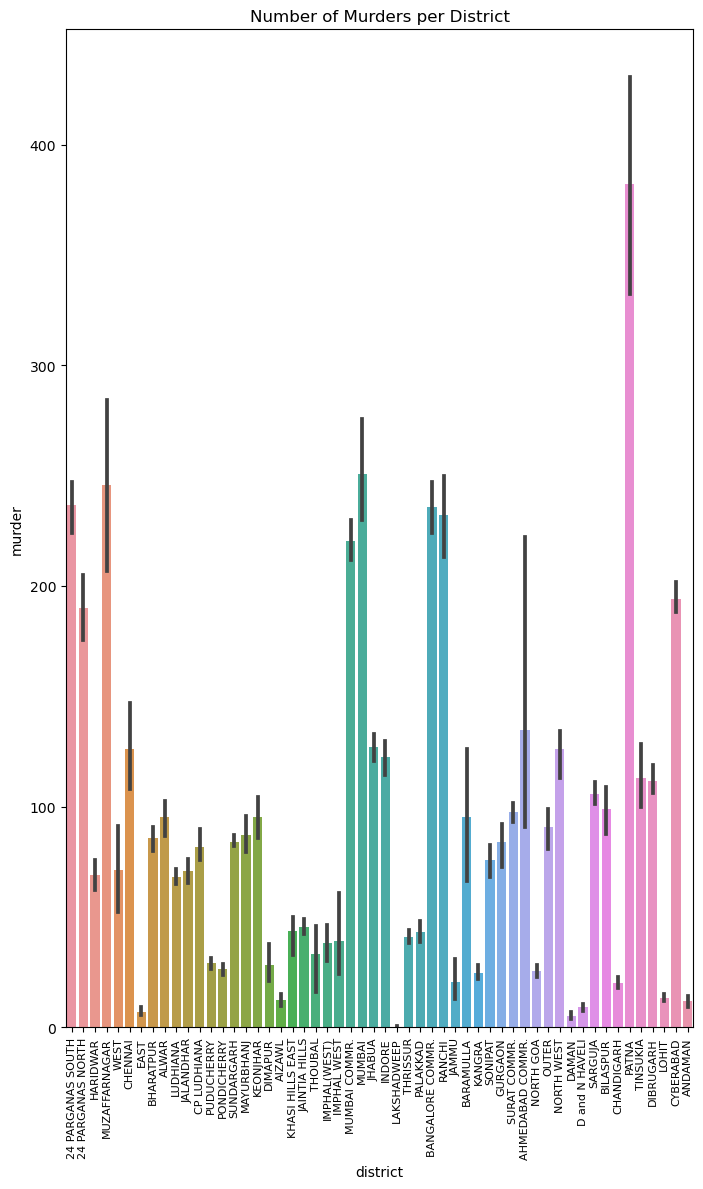

In [28]:
plt.figure(figsize=(20, 12))

plt.subplot(1, 3, 1)
sns.barplot(data=sorted_filtered_df, x='district', y='murder')
plt.title('Number of Murders per District')
plt.xticks(rotation=90, fontsize=8)  

plt.tight_layout()
plt.show()


observation : Patna is the district with highest murder , mumbai second highest 

(array([2000., 2002., 2004., 2006., 2008., 2010., 2012., 2014.]),
 [Text(2000.0, 0, '2000'),
  Text(2002.0, 0, '2002'),
  Text(2004.0, 0, '2004'),
  Text(2006.0, 0, '2006'),
  Text(2008.0, 0, '2008'),
  Text(2010.0, 0, '2010'),
  Text(2012.0, 0, '2012'),
  Text(2014.0, 0, '2014')])

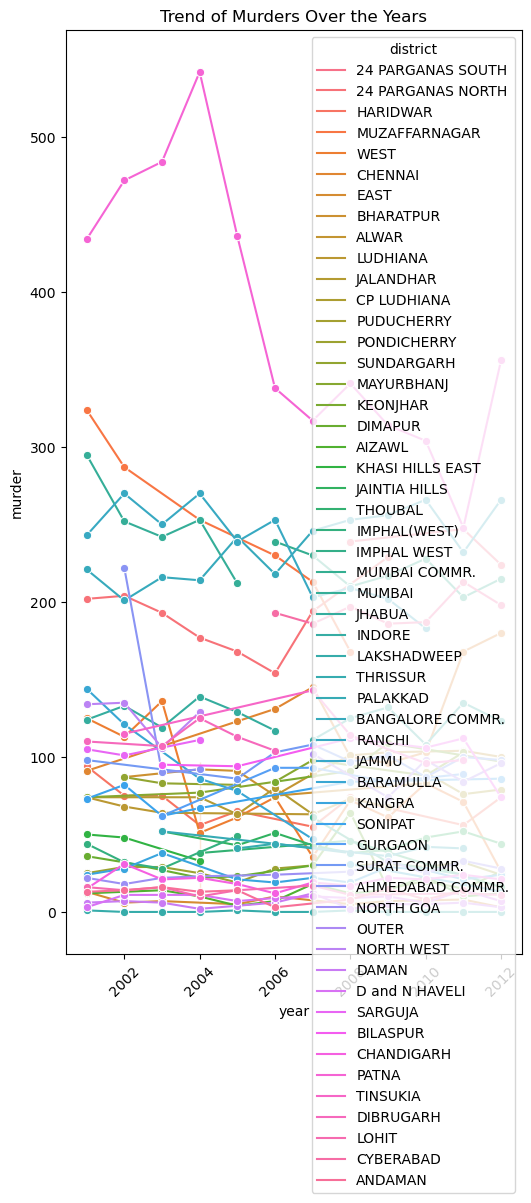

In [37]:
plt.figure(figsize=(20, 12))
# Line Plot: Trend of murders over the years for each district
plt.subplot(1, 3, 2)
sns.lineplot(data=sorted_filtered_df, x='year', y='murder', hue='district', marker='o')
plt.title('Trend of Murders Over the Years')
plt.xticks(rotation=45, fontsize=10)  # Adjust rotation and font size

Observation : The graph shows decrease in murder from 2002-2006 in patna and also contains district wise murder crime over the years in the table and also not able to understand as high no. of disrict to overcome this below show trend of top 10 district wise murder trend over the years

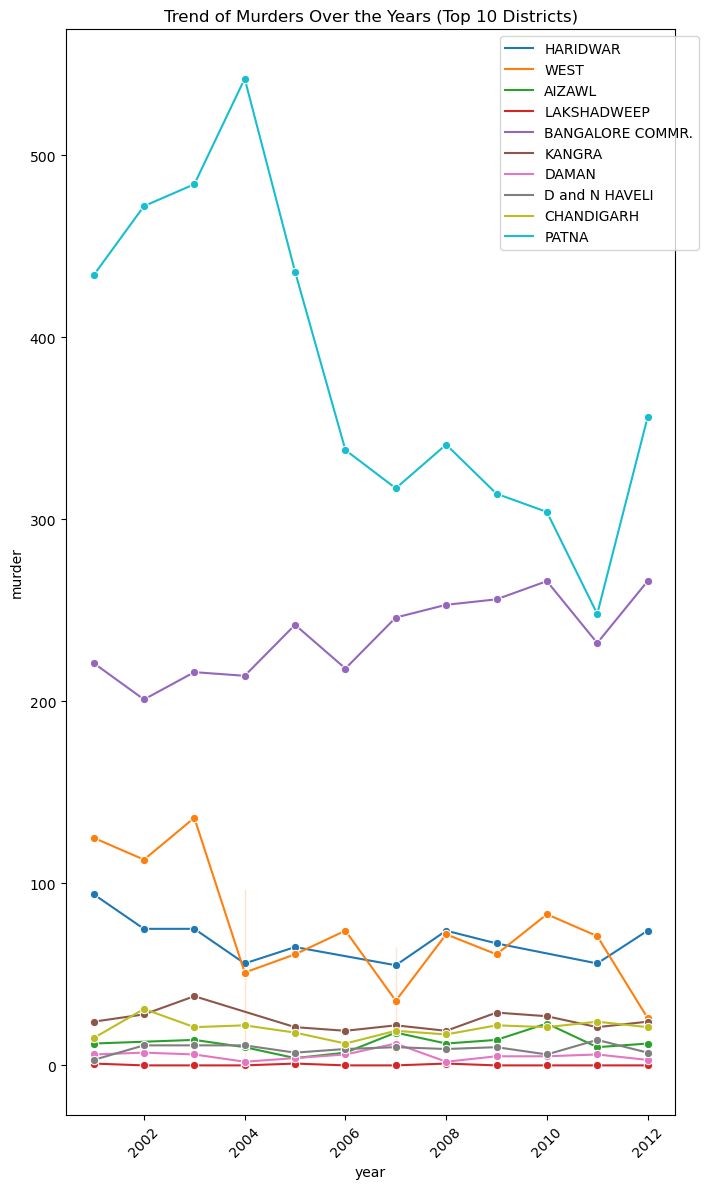

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(20, 12))
plt.subplot(1, 3, 2)

# Top 10 districts with the highest number of murders
top_districts = sorted_filtered_df['district'].value_counts().head(10).index

# Filter the data to include only the top 10 districts
filtered_df = sorted_filtered_df[sorted_filtered_df['district'].isin(top_districts)]

sns.lineplot(data=filtered_df, x='year', y='murder', hue='district', marker='o')
plt.title('Trend of Murders Over the Years (Top 10 Districts)')
plt.xticks(rotation=45, fontsize=10)  # Adjust rotation and font size

plt.legend(loc='upper right', bbox_to_anchor=(1.05, 1))  # Move legend outside the plot
plt.tight_layout()  # Ensure labels fit within the figure
plt.show()

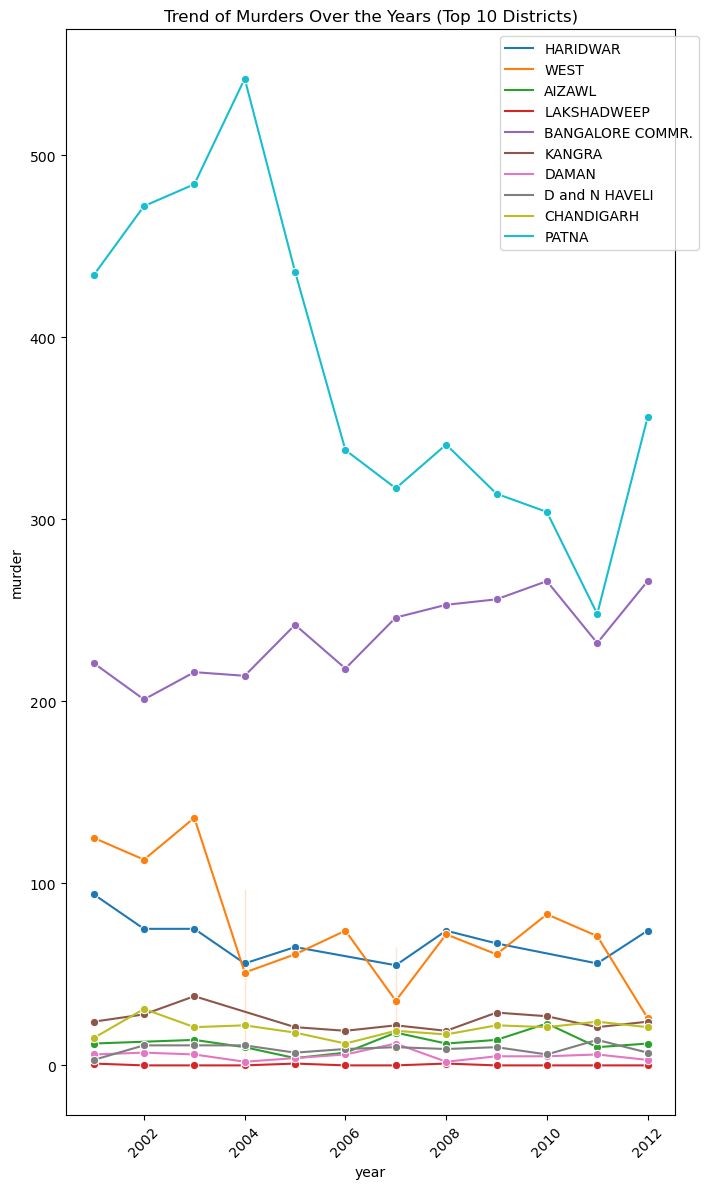

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(20, 12))
plt.subplot(1, 3, 2)

# Top 10 districts with the highest number of murders
top_murder = sorted_filtered_df['murder'].value_counts().head(10).index

# Filter the data to include only the top 10 districts
filtered_df = sorted_filtered_df[sorted_filtered_df['district'].isin(top_districts)]

sns.lineplot(data=filtered_df, x='year', y='murder', hue='district', marker='o')
plt.title('Trend of Murders Over the Years (Top 10 Districts)')
plt.xticks(rotation=45, fontsize=10)  # Adjust rotation and font size

plt.legend(loc='upper right', bbox_to_anchor=(1.05, 1))  # Move legend outside the plot
plt.tight_layout()  # Ensure labels fit within the figure
plt.show()

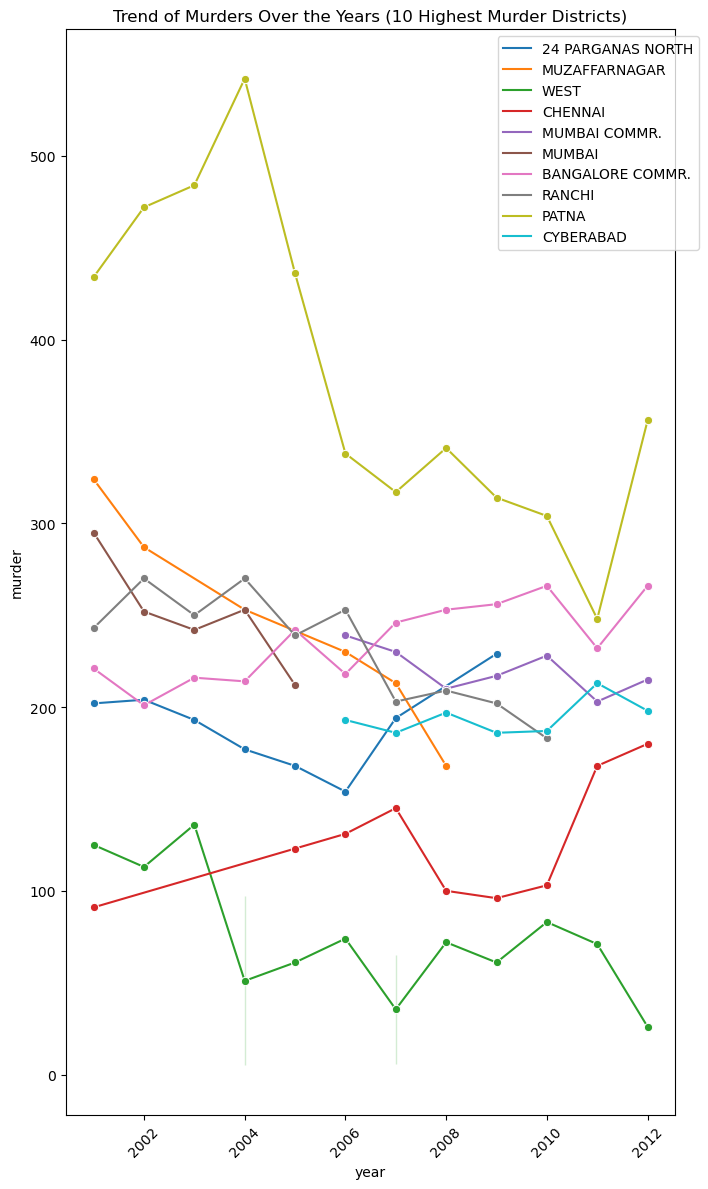

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(20, 12))
plt.subplot(1, 3, 2)

# Top 10 districts with the highest number of murders
top_murder = sorted_filtered_df.groupby('district')['murder'].sum().sort_values(ascending=False).head(10).index

# Filter the data to include only the top 10 districts
filtered_df = sorted_filtered_df[sorted_filtered_df['district'].isin(top_murder)]

sns.lineplot(data=filtered_df, x='year', y='murder', hue='district', marker='o')
plt.title('Trend of Murders Over the Years (10 Highest Murder Districts)')
plt.xticks(rotation=45, fontsize=10)  # Adjust rotation and font size

plt.legend(loc='upper right', bbox_to_anchor=(1.05, 1))  # Move legend outside the plot
plt.tight_layout()  # Ensure labels fit within the figure
plt.show()

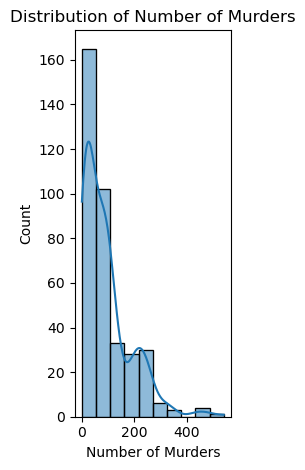

In [34]:
# Histogram: Distribution of the number of murders
plt.subplot(1, 3, 3)
sns.histplot(sorted_filtered_df['murder'], bins=10, kde=True)
plt.title('Distribution of Number of Murders')
plt.xlabel('Number of Murders')

plt.tight_layout()
plt.show()

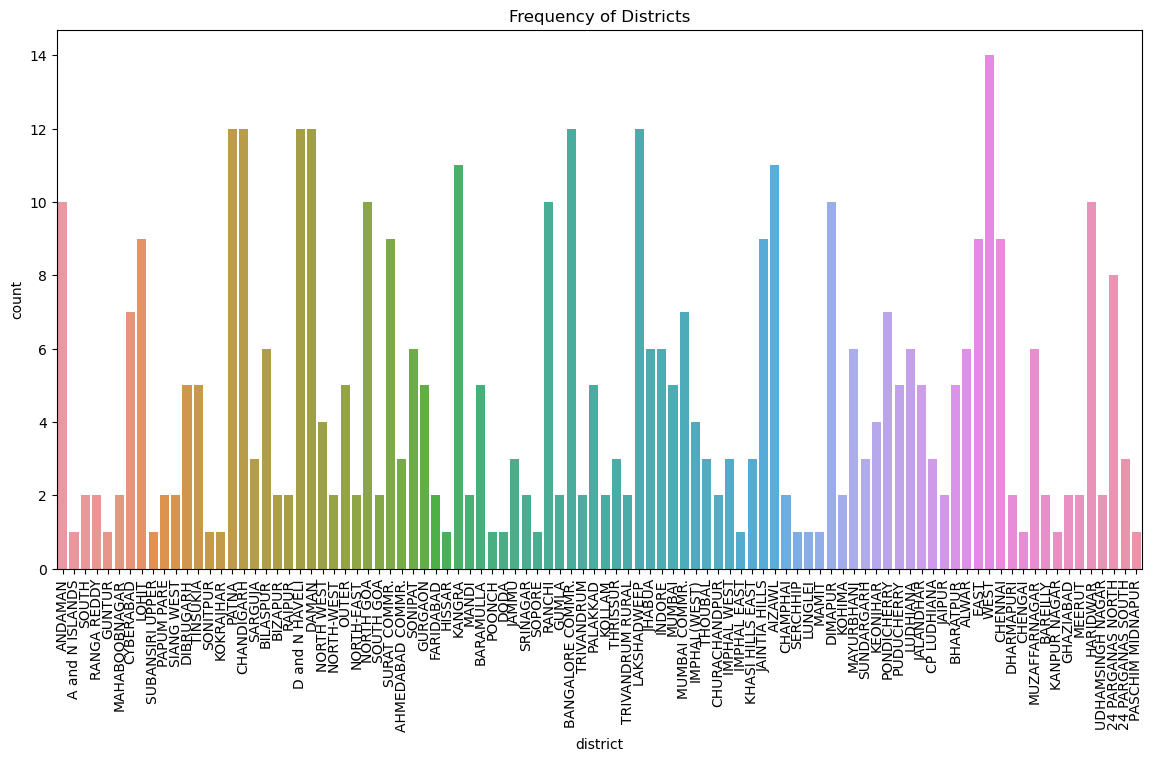

WEST                14
BANGALORE COMMR.    12
DAMAN               12
D and N HAVELI      12
CHANDIGARH          12
                    ..
A and N ISLANDS      1
MAMIT                1
LUNGLEI              1
SERCHHIP             1
PASCHIM MIDNAPUR     1
Name: district, Length: 96, dtype: int64


In [36]:
# Count Plot: Frequency of districts
plt.figure(figsize=(14, 7))  # Adjust the figure size
sns.countplot(x='district', data=df)
plt.xticks(rotation=90, fontsize=10)  # Increase the font size
plt.title('Frequency of Districts')
plt.show()

# Print the value counts of districts
print(df['district'].value_counts())

Observation : WEST district count is maximum in the table under state/ut delhi